# Tutorial del manejo del mne
Este breve tutorial busca replicar el tutorial de la librería eeglab utilizando el mne. Para ello se utilizará el dataset de la competencia de Kaggle de EEG. El dataset se encuentra en el siguiente link: https://www.kaggle.com/c/grasp-and-lift-eeg-detection/data

## Lectura de los datos

In [43]:
import mne

eeglab_raw = mne.io.read_raw_eeglab('data/eeglab_data.set', preload=True)
#guardalo como un archivo fif

print(type(eeglab_raw))

Reading /Users/jorgerivera/Library/CloudStorage/Dropbox/Programming/eeg_project/eeg-project/data/eeglab_data.fdt
Reading 0 ... 30503  =      0.000 ...   238.305 secs...
<class 'mne.io.eeglab.eeglab.RawEEGLAB'>


# Lectura de los eventos
MNE permite manejar los eventos de forma sencilla a través de las funciones que proporciona la librería. Los eventos se refieren a los momentos en los que ocurren estímulos o eventos durante la grabación de una señal de EEG, y se almacenan en un archivo de eventos. Cada evento se describe por un marcador, que es una etiqueta que lo identifica, y un tiempo que indica cuándo ocurrió el evento.

Para trabajar con eventos en MNE, puedes seguir los siguientes pasos:

Cargar los datos EEG y los eventos asociados en un objeto Raw de MNE. Para esto, utiliza las funciones mne.io.read_raw_*() y mne.read_events(). Por ejemplo:

````python
raw = mne.io.read_raw_fif('archivo.fif', preload=True)
events = mne.read_events('archivo.fif')

````
EL objeto 'events' es un arreglo de numpy de 3 columnas, donde cada fila representa un evento. La primera columna contiene el tiempo del evento, la segunda columna contiene el valor del marcador y la tercera columna contiene el número de canal.




In [44]:
events, event_dict = mne.events_from_annotations(eeglab_raw)

Used Annotations descriptions: ['rt', 'square']


In [45]:
cuadrado = events[events[:, 2] == event_dict['square']]
rt=events[events[:, 2] == event_dict['rt']]


## Obtención del tipo de evento y su latencia
Esta función devuelve el tipo de evento y su latencia en milisegundos. Para ello, se utiliza la función mne.find_events().

 


In [46]:
freq=eeglab_raw.info['sfreq']
type(freq)
#events[:,0]*=(1/freq)

float

## Función que retorna el nombre del evento a partir del valor del marcador
Esta función lee el archivo de eventos y devuelve el nombre del evento  tal cuál aparece en el diccionario de eventos.

In [47]:
def get_event_name(event_dict, value):
    for key, val in event_dict.items():
        if val == value:
            return key
evento=get_event_name(event_dict, 2)
print(evento)


square


#

In [48]:
print("Event dict is:", event_dict)
print("Event dict rt is:", event_dict['rt'])

Event dict is: {'rt': 1, 'square': 2}
Event dict rt is: 1


In [49]:
#definir una función para saber cuantos eventos hay de cada tipo
def count_events(events):
    event_dict = {}
    for event in events:
        if event[2] in event_dict:
            event_dict[event[2]] += 1
        else:
            event_dict[event[2]] = 1
    return event_dict
print(count_events(events))

{2: 80, 1: 74}


In [50]:
#define una funcion que devuelva un array con los eventos de un tipo y su duración
def get_events(events, event_type):
    event_array = []
    for event in events:
        if event[2] == event_type:
            event_array.append(event)
    return event_array
array=get_events(events, 1)
#imprime el array
print(array)

[array([267,   0,   1]), array([659,   0,   1]), array([1447,    0,    1]), array([1807,    0,    1]), array([2200,    0,    1]), array([2586,    0,    1]), array([2961,    0,    1]), array([3344,    0,    1]), array([3730,    0,    1]), array([4111,    0,    1]), array([4512,    0,    1]), array([4897,    0,    1]), array([5277,    0,    1]), array([5671,    0,    1]), array([6036,    0,    1]), array([6435,    0,    1]), array([6815,    0,    1]), array([7195,    0,    1]), array([7582,    0,    1]), array([7960,    0,    1]), array([8353,    0,    1]), array([8781,    0,    1]), array([9123,    0,    1]), array([9513,    0,    1]), array([10274,     0,     1]), array([10664,     0,     1]), array([11048,     0,     1]), array([11428,     0,     1]), array([11817,     0,     1]), array([12198,     0,     1]), array([12592,     0,     1]), array([12974,     0,     1]), array([13354,     0,     1]), array([13740,     0,     1]), array([14134,     0,     1]), array([14517,     0,     1]

In [51]:
#mostrar la frecuencia de muestro del dataset
print(eeglab_raw.info['sfreq'])

128.0


In [52]:
# construye una funcion que devuelva el tiempo de inicio y fin de un evento y el tipo de evento
def get_event_time(events, event_type):
    event_array = []
    for event in events:
        if event[2] == event_type:
            event_array.append(event)
    return event_array
array=get_event_time(events, 1)
#imprime el array
print(array[3])


[1807    0    1]


## Localización de los electrodos
La localización de los electrodos se realiza a través de la función mne.channels.read_montage(). Esta función permite leer un archivo de localización de electrodos y devuelve un objeto Montage. Para ello, se utiliza la función mne.channels.read_montage().

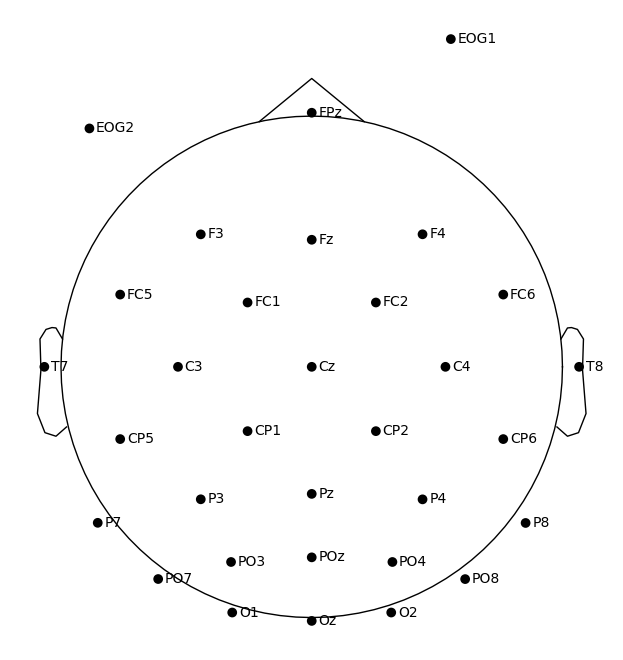

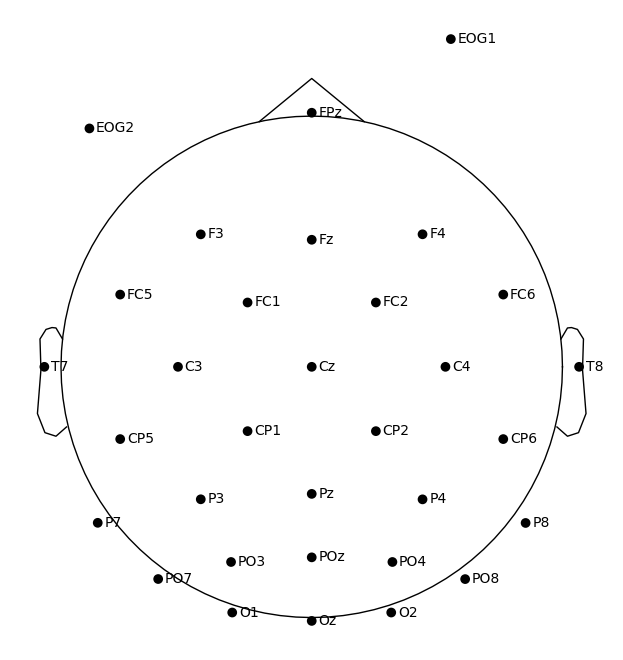

In [54]:
locs ='data/eeglab_chan32.locs'
montage = mne.channels.read_custom_montage(locs)
eeglab_raw.set_montage(montage)
mne.viz.plot_sensors(eeglab_raw.info, kind='topomap', ch_type='eeg', show_names=True)


## Filtrado de la señal de EEG
En esta parte se muestra la señal y se realiza un filtrado

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 423 samples (3.305 sec)

Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 845 samples (6.602 sec)

Effective window size : 2.00

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    0.0s finished
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/

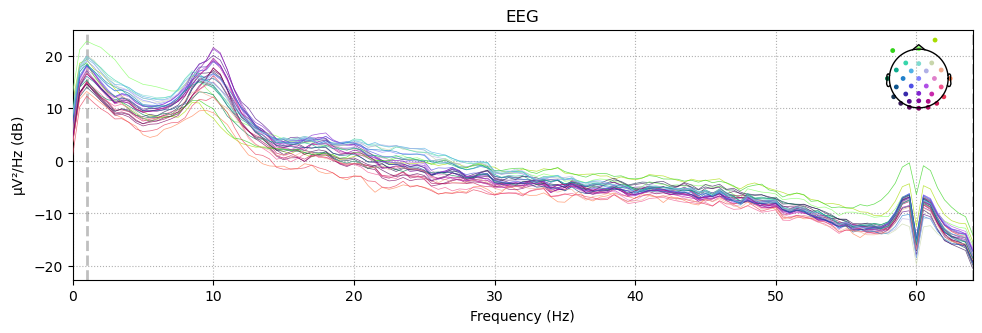

In [72]:
fmin, fmax = 1, None
eeg_filtered =eeglab_raw.copy().filter(fmin, fmax)
t=4.0
eeg_filter_notch=eeg_filtered.copy().notch_filter([60] )
eeg_filter_notch.compute_psd().plot()


## Re- referenciando la señal de EEG
Con la siguiente función se re-referencia la señal de EEG creando una referencia promedio de todos los electrodos. Esto es útil cuando se quiere eliminar la actividad de la corriente continua de la señal de EEG.

In [73]:
eeglab_raw_referenced=eeglab_raw.set_eeg_reference('average')
eeglab_raw.plot()
eeglab_raw_referenced.plot()

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Using pyopengl with version 3.1.6
Using pyopengl with version 3.1.6
